## Artists Exploratory Data Analysis

The `artist.csv` file contains artists data fetched from the playlists from `playlist_filtered.csv` data.

This notebook includes:
- Remove collaboratorsand other non-bolivian artists.
- Top 5 Bolivian Artists.
- Top Genres.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('artists.csv')
df = df.sort_values(by='followers', ascending=False)
df = df.reset_index(drop=True)
df.shape

(271, 5)

In [3]:
df.head(20)

,artist_id,name,popularity,followers,genres
0,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,911077,[]
1,5ZAR5Usb11xw4KENbEE8uZ,Agua Marina,61,520635,"['cumbia peruana', 'pop peruano']"
2,43qxAkuKFB6fMNSeS5dO7Z,Ana Bárbara,67,510130,"['grupera', 'latin', 'mexican pop', 'ranchera']"
3,5xwugJ4uudppmOCCZateE5,Liberación,67,490466,"['banda', 'cumbia', 'grupera', 'gruperas inmor..."
4,6pVmT18pd1QaofDegZUEKX,La Nueva Luna,62,354542,"['argentine rock', 'cumbia villera']"
5,1bwsprbGyKx2vBbPAwVebl,Noche de Brujas,60,329380,"['cumbia chilena', 'cumbia ranchera']"
6,0CBKUzrf6yGdTgxAQbUUHS,Rafaga,64,328144,"['cumbia chilena', 'cumbia villera']"
7,3NLDQVyI2LVtQFJt8JeAAx,Guardianes Del Amor,59,305856,"['cumbia', 'cumbia sonidera', 'duranguense', '..."
8,1GlOpg3dPUft550esb82K3,Chaqueño Palavecino,61,259179,"['chamame', 'cumbia villera', 'folclore salten..."
9,6fBjnfeYEU3VFuQl8RPrp8,Samuray,59,225439,"['banda', 'cumbia', 'cumbia sonidera', 'durang..."


### Remove non-Bolivian artists
All artists including substring of other countres in genere.

In [4]:
internationals = df[df.genres.str.contains('argentin|chile|colombia|mexic|peru|uruguay')]
df = df[~df.artist_id.isin(internationals.artist_id)]
print("Internationals", internationals.shape)
internationals[['name', 'genres']]

Internationals (30, 5)


,name,genres
1,Agua Marina,"['cumbia peruana', 'pop peruano']"
2,Ana Bárbara,"['grupera', 'latin', 'mexican pop', 'ranchera']"
3,Liberación,"['banda', 'cumbia', 'grupera', 'gruperas inmor..."
4,La Nueva Luna,"['argentine rock', 'cumbia villera']"
5,Noche de Brujas,"['cumbia chilena', 'cumbia ranchera']"
6,Rafaga,"['cumbia chilena', 'cumbia villera']"
7,Guardianes Del Amor,"['cumbia', 'cumbia sonidera', 'duranguense', '..."
8,Chaqueño Palavecino,"['chamame', 'cumbia villera', 'folclore salten..."
9,Samuray,"['banda', 'cumbia', 'cumbia sonidera', 'durang..."
10,Maniako,['mexican hip hop']


In [5]:
df.head(5)

,artist_id,name,popularity,followers,genres
0,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,911077,[]
14,4cCVNFShP38zaKGuo8QSMN,Inti-Illimani,53,168208,"['andean', 'latin rock', 'nueva cancion', 'tro..."
15,6gWVXK2R7WYXTqxULGAyfx,Illapu,59,164552,"['andean', 'latin rock', 'nueva cancion']"
17,58LNn3iNPmmHusH1EkyBm4,Maria Dolores Pradera,55,136410,"['bolero', 'cancion melodica', 'cantautor', 'f..."
18,37zUz0gjTaNCWTOymnuWGG,Jambao,56,134445,"['cuarteto', 'cumbia villera']"


## Manually excluded

In [6]:
excluded_artists = pd.read_csv('artists_excluded.csv')
excluded_artists.shape

(27, 5)

In [7]:
df = df[~df.artist_id.isin(excluded_artists.artist_id)]
df.shape

(216, 5)

In [8]:
df.iloc[range(50)].reset_index(drop=True)[['name','popularity','followers', 'genres']]

,name,popularity,followers,genres
0,Los Kjarkas,56,97077,"['andean', 'charango', 'folklore boliviano']"
1,Elias Ayaviri,48,47069,['hip hop boliviano']
2,Bonny Lovy,47,35314,"['cumbia boliviana', 'pop reggaeton']"
3,Savia Andina,44,27731,"['andean', 'folklore boliviano']"
4,Proyección,43,19783,"['andean', 'folklore boliviano']"
5,Matamba,38,18036,"['bolivian rock', 'reggae en espanol']"
6,azul azul,50,16351,['latin pop']
7,Kala Marka,39,15360,['andean']
8,Diego Ríos,41,15293,['cumbia boliviana']
9,Chila Jatun,42,14970,['andean']


In [9]:
# df.to_csv('artists_flitered.csv', index=False)

## Exploratory Data Analysis

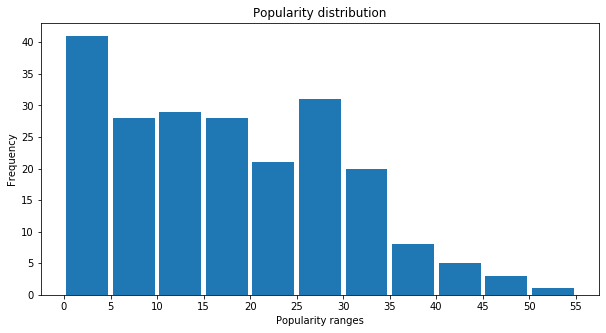

In [10]:
bins = np.arange(0, 60, 5)
ax = df.popularity.plot.hist(bins=np.arange(0, 60, 5), rwidth=0.9, figsize=(10,5));
ax.set_title('Popularity distribution');
ax.set_xlabel('Popularity ranges')
plt.xticks(bins, bins);

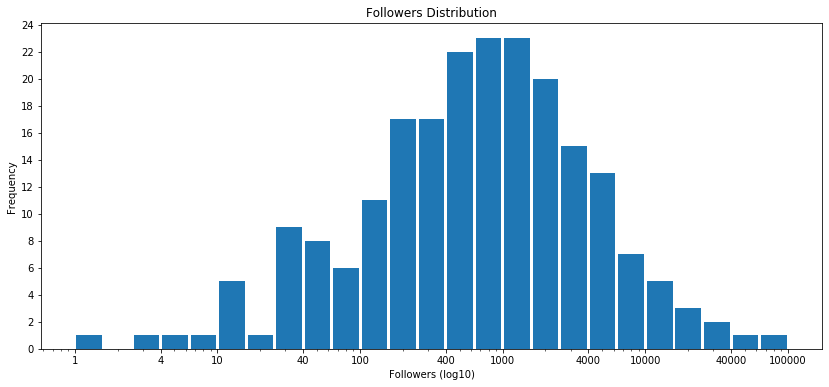

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
plt.xscale('log')

positive_followers = df.followers[df.followers > 0]
positive_followers_log = np.log10(positive_followers)

bin_edges = 10 ** np.arange(0, positive_followers_log.max()+0.2, 0.2)
ax.hist(positive_followers, bins=bin_edges, rwidth=0.90)

xticks = [1,4,10, 40, 100, 400, 1000, 4000, 10000, 40000, 100000]
plt.xticks(xticks, xticks)
yticks = np.arange(0, 25, 2)
plt.yticks(yticks, yticks)
plt.title("Followers Distribution")
plt.ylabel("Frequency")
plt.xlabel("Followers (log10)");

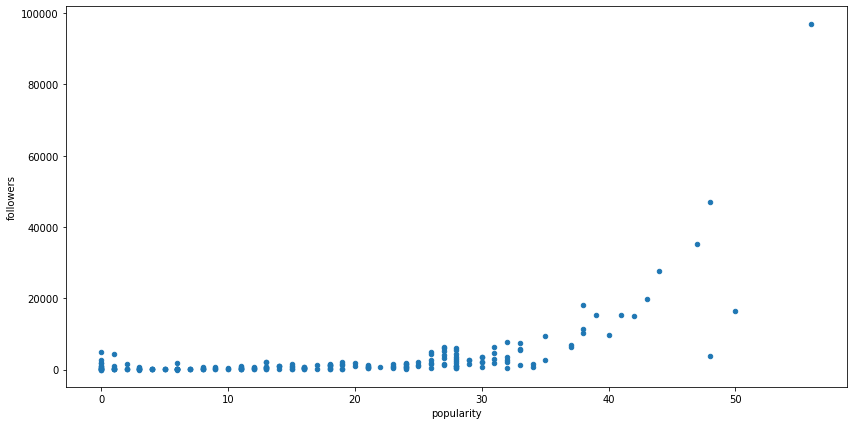

In [12]:
# Popularity vs Followers
ax = df.plot.scatter(x='popularity', y='followers', figsize=(14,7))

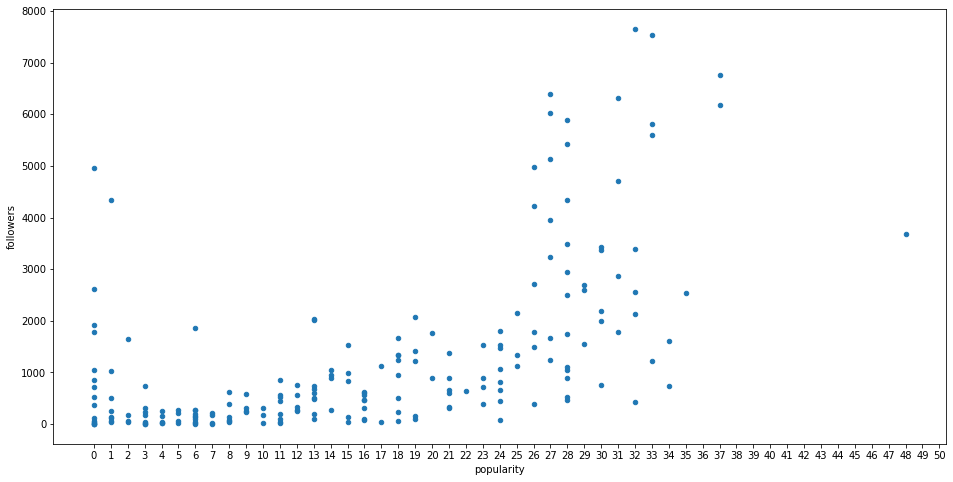

In [13]:
# Zoomed Popularity vs Followers
followers_limit = 8000
zoomed_data = (df.followers <= followers_limit)
ax = df[zoomed_data].plot.scatter(x='popularity', y='followers', figsize=(16,8))
plt.xticks(range(51), range(51));